<a href="https://colab.research.google.com/github/AlexanderG40/Data-Science/blob/main/week8_assignment_8_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

About the data:

Order Value: Represents the total value of the customer's order.

Customer Rating: Represents the rating given by the customer, typically between 1 and 5.

Shipping Time (Days): Represents the number of days taken to deliver the order.


**Note: This assignment and dataset have outliers and missing values generated on purpose to help you understand the importance of data cleaning and preprocessing in preparing data for analysis and modeling**

In [8]:
# Run this cell first and then answer the questions given in the assignment.

import numpy as np
import pandas as pd

np.random.seed(42)

# Generating sample data
data = {
    'Order Value': np.random.normal(100, 20, 30),
    'Customer Rating': np.random.normal(4, 0.5, 30),
    'Shipping Time (Days)': np.random.randint(1, 10, 30)
}

# Introducing missing values and outliers on purpose
data['Order Value'][np.random.choice(30, 8, replace=False)] = np.nan
data['Customer Rating'][np.random.choice(30, 7, replace=False)] = np.nan

data['Order Value'][np.random.choice(30, 7, replace=False)] = [300, 400, 300, 350, 400, 450, 700]
data['Customer Rating'][np.random.choice(30, 5, replace=False)] = [1, 5, 0.5, 5.5, 1]

# Convert to DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
df


,Order Value,Customer Rating,Shipping Time (Days)
0,109.934283,3.699147,2
1,97.234714,4.926139,1
2,112.953771,3.993251,7
3,130.460597,NaN,7
4,NaN,1.000000,8
5,95.317261,NaN,5
6,400.000000,4.104432,3
7,700.000000,3.020165,8
8,90.610512,3.335907,6
9,350.000000,NaN,3


In [9]:
# here we import pandas as our python library for this assignment for missing values.
# we will first use pandas to find the null values in our data
# we will use isna to find where in our data we have our missing values.
# https://www.geeksforgeeks.org/python-pandas-dataframe-isna/
df.isna()


,Order Value,Customer Rating,Shipping Time (Days)
0,False,False,False
1,False,False,False
2,False,False,False
3,False,True,False
4,True,False,False
5,False,True,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,True,False


As we can see from our above data it pretty much is like a bool in coding it either turns true or false indicating weather there is a missing value.

In [10]:
# now knowing the data from above we will finally print where our data is missing
# we use the sum method to sum all of our null/na values.
# https://www.geeksforgeeks.org/python-pandas-dataframe-isna/
df.isna().sum()

,0
Order Value,6
Customer Rating,5
Shipping Time (Days),0


we will finally drop our null values to have a cleaner dataset

In [11]:
df.dropna()

,Order Value,Customer Rating,Shipping Time (Days)
0,109.934283,3.699147,2
1,97.234714,4.926139,1
2,112.953771,3.993251,7
6,400.000000,4.104432,3
7,700.000000,3.020165,8
8,90.610512,3.335907,6
10,90.731646,4.369233,1
11,90.685405,4.085684,3
12,450.000000,3.942176,5
13,400.000000,1.000000,3


here we will see our data set using scatterplots, box plots and even histogram

<Axes: >

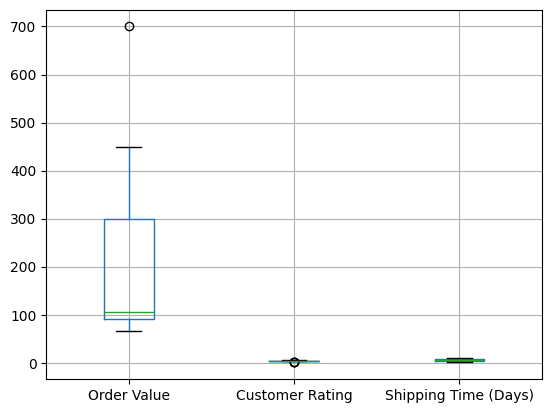

In [12]:
# here is the start of our box plot for our data so we can visualize it.
# https://www.geeksforgeeks.org/how-to-create-boxplot-from-pandas-dataframe/
df = pd.DataFrame(data)
df.boxplot(column=['Order Value', 'Customer Rating', 'Shipping Time (Days)'])

As we can see from this box plot, our order value is the biggest one which makes sense because their orders range from around 100 to about 300. While it would not make sense for a customer rating or shipping time to be 100 unless of course it gets lost or something.

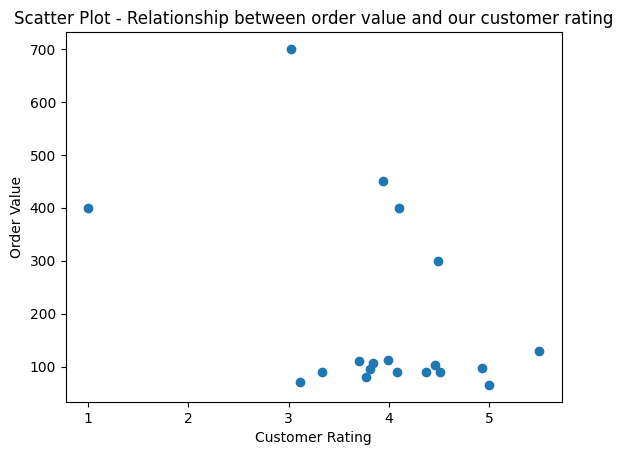

In [15]:
# here we will set up a scatter plot to show the relationship between our data.
import matplotlib.pyplot as plt
# https://www.geeksforgeeks.org/matplotlib-pyplot-scatter-in-python/
plt.title('Scatter Plot - Relationship between order value and our customer rating')
plt.xlabel('Customer Rating')
# here we make y our order value as it is the biggest values and to keep it easy to see
plt.ylabel('Order Value')
plt.scatter(df['Customer Rating'], df['Order Value'])
plt.show()

As we can see we have a few outliers the first the the one between 3,700 and another at 1, 400

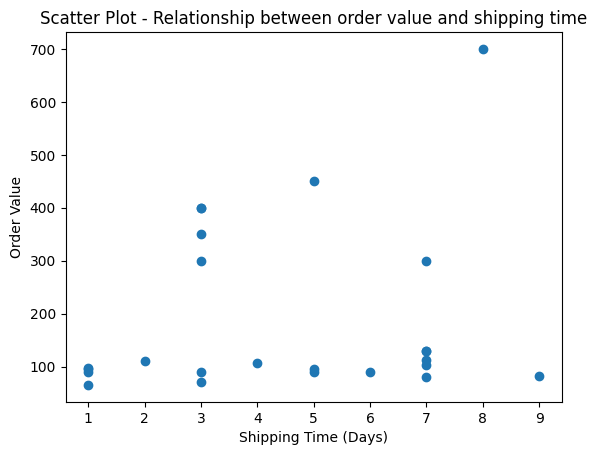

In [16]:
# we make another scatterplot but now with the shipping time and order value
plt.title('Scatter Plot - Relationship between order value and shipping time')
plt.xlabel('Shipping Time (Days)')
plt.ylabel('Order Value')
plt.scatter(df['Shipping Time (Days)'], df['Order Value'])
plt.show()

There is less outliers in this one there is a outlier at 8, 700 and 5, 470 or so.

Now we will create a histogram between the data to show any relationships and outliers

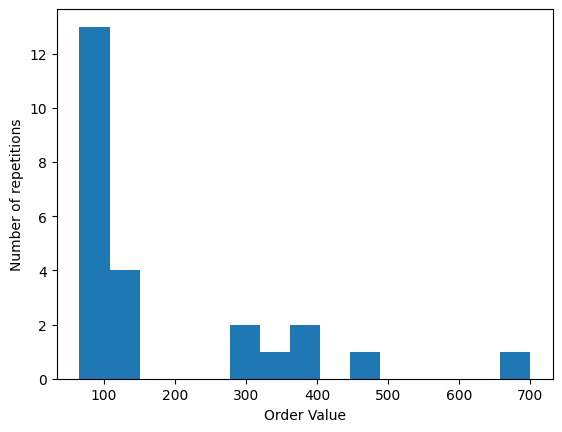

In [34]:
# start of our histogram between our order value
# https://www.geeksforgeeks.org/plotting-histogram-in-python-using-matplotlib/
plt.hist(df['Order Value'], bins = 15)
plt.xlabel('Order Value')
plt.ylabel('Number of repetitions')
plt.show()

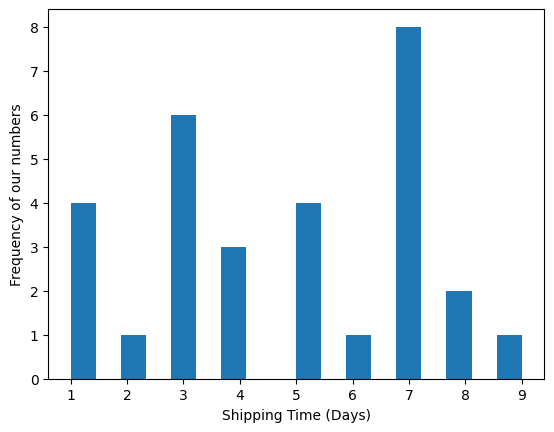

In [35]:
# we will create another histogram where we show the relationship between the order value and our shipping days
plt.hist(df['Shipping Time (Days)'], bins = 18)
plt.xlabel('Shipping Time (Days)')
plt.ylabel('Frequency of our numbers')
plt.show()

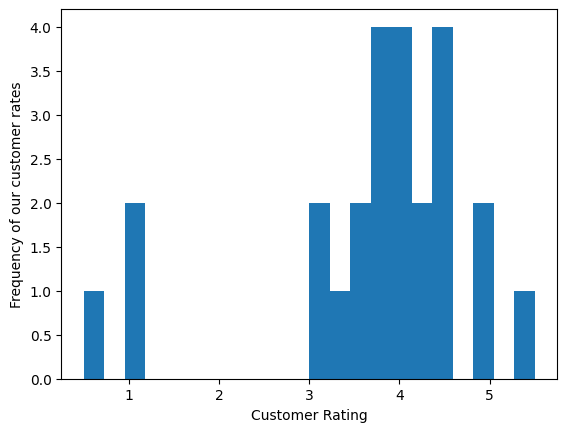

In [36]:
# finally we will create our customer ratings to see how what was the average
plt.hist(df['Customer Rating'], bins = 22)
plt.xlabel('Customer Rating')
plt.ylabel('Frequency of our customer rates')
plt.show()

In [38]:
# next we will use the Z score for any outliers
# however according to geeks for geeks we first need to find the mean
mean = np.mean(df)
# now we look for the standard deviation
standard = np.std(df)
# we print our mean and standard deviation
print('the mean is:', mean )
print('the standard deviation is:', standard)

the mean is: 60.45073824623519
the standard deviation is: Order Value             160.647495
Customer Rating           1.193257
Shipping Time (Days)      2.347812
dtype: float64


/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
